In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_csv("country_data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape

(167, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

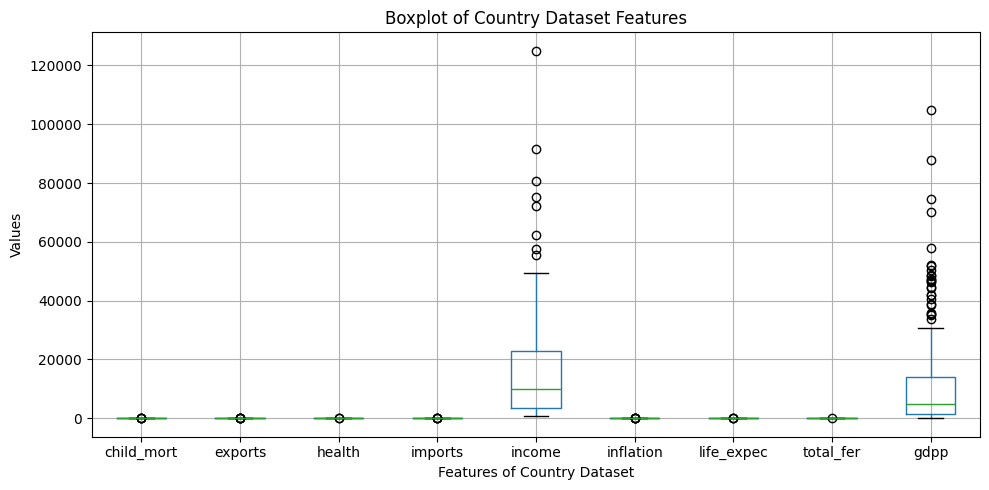

In [7]:
# Boxplot of the dataset to spot outliers
df.boxplot(figsize=(10,5))

# Add title and labels
plt.title('Boxplot of Country Dataset Features')
plt.xlabel('Features of Country Dataset')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

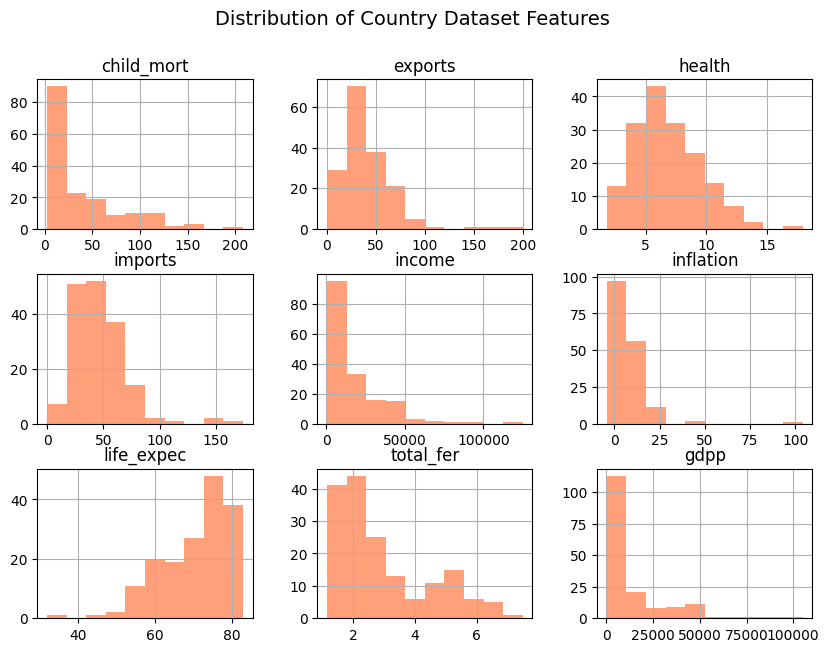

In [8]:
# Histogram of the dataset
df.hist(bins=10, color='#FFA07A', figsize=(10,7))

# Add title
plt.suptitle('Distribution of Country Dataset Features', fontsize=14)

plt.show()

In [9]:
# Feature clipping right skewed features
# Define list of right skewed featutres
features = ['gdpp', 'income', 'child_mort', 'exports', 'imports', 'inflation']

# Feature clip
for feature in features:
    lower_limit, upper_limit = np.percentile(df[feature], [1,95])
    df[feature] = np.clip(df[feature], lower_limit, upper_limit)

# Feature clipping left skewed features
lower_limit, upper_limit = np.percentile(df['life_expec'], [5,100])
df['life_expec'] = np.clip(df['life_expec'], lower_limit, upper_limit)

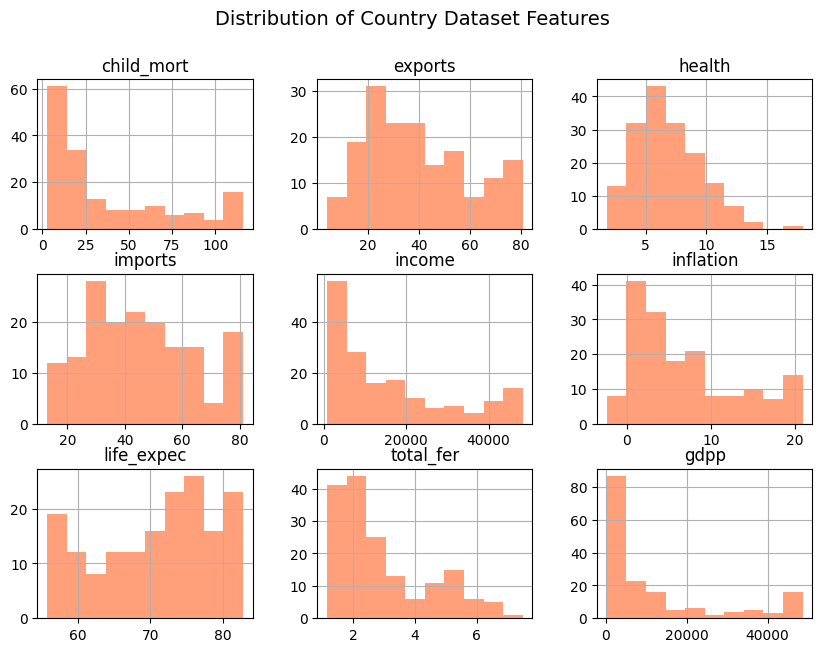

In [10]:
# Histogram of the dataset
df.hist(bins=10, color='#FFA07A', figsize=(10,7))

# Add title
plt.suptitle('Distribution of Country Dataset Features', fontsize=14)

plt.show()

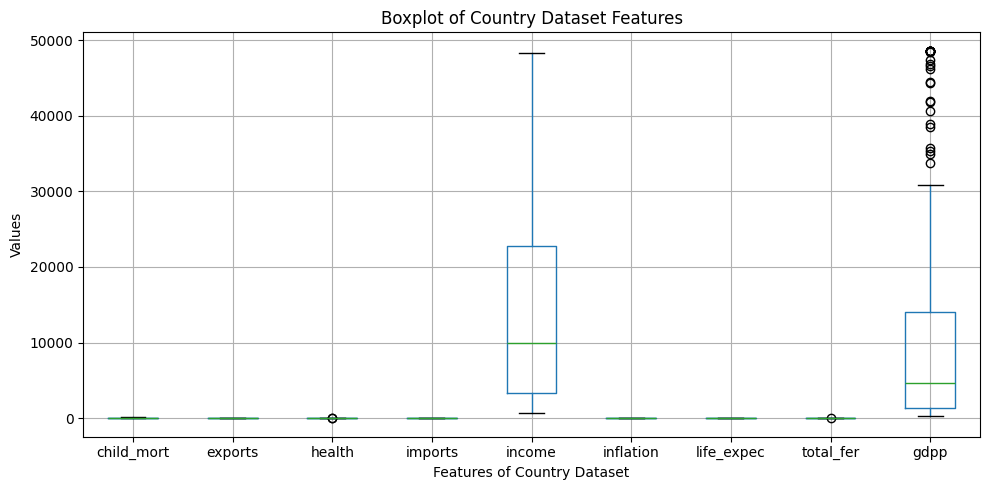

In [11]:
# Boxplot of the dataset to spot outliers
df.boxplot(figsize=(10,5))

# Add title and labels
plt.title('Boxplot of Country Dataset Features')
plt.xlabel('Features of Country Dataset')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

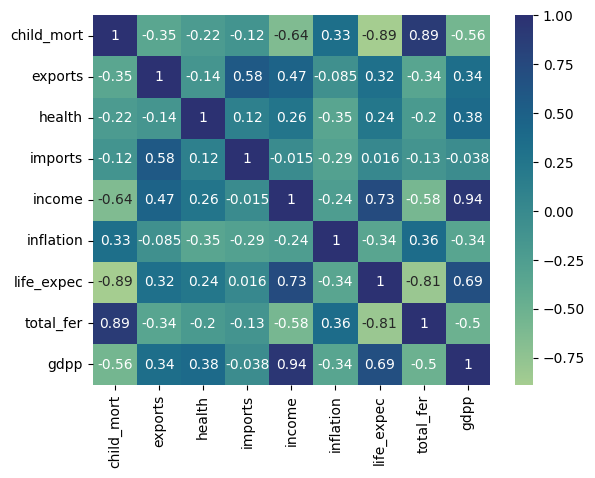

In [12]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='crest')
plt.show()

In [13]:
# Scale the features
features = df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [14]:
# Finding the k value
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(scaled_features)
    sse.append(km.inertia_)

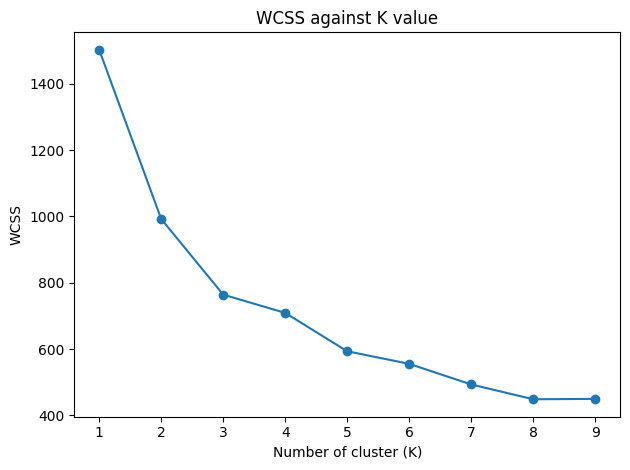

In [15]:
# plot
plt.plot(k_rng, sse, marker='o')
plt.xlabel('Number of cluster (K)')
plt.ylabel('WCSS')
plt.title('WCSS against K value')
plt.tight_layout()
plt.show()

In [16]:
## dimensionality reduction
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(scaled_features)

In [17]:
# Use the cluster to be 3
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(reduced_data)
y_predicted

array([0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 1, 2, 0, 2, 0, 2, 2,
       1, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 2, 0, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 2,
       0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0,
       1, 1, 0, 0, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 2, 2,
       0, 1, 2, 1, 2, 0, 1, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 1,
       2, 0, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0], dtype=int32)

In [18]:
# put the cluster into the dataframe
df['Cluster'] = y_predicted

df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.20,5.82,553.0,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.30,1.65,4090.0,2
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.50,2.89,4460.0,0
3,Angola,116.0,62.3,2.85,42.9,5900.0,20.87,60.10,6.16,3530.0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.80,2.13,12200.0,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.00,3.50,2970.0,2
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,20.87,75.40,2.47,13500.0,0
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.10,1.95,1310.0,2
165,Yemen,56.3,30.0,5.18,34.4,4480.0,20.87,67.50,4.67,1310.0,0


In [19]:
# centroid
km.cluster_centers_

array([[-2.01120899, -0.35273166, -0.27660085],
       [ 2.47011397, -0.68481352, -0.01311363],
       [ 0.38544045,  0.96601603,  0.3365316 ]])

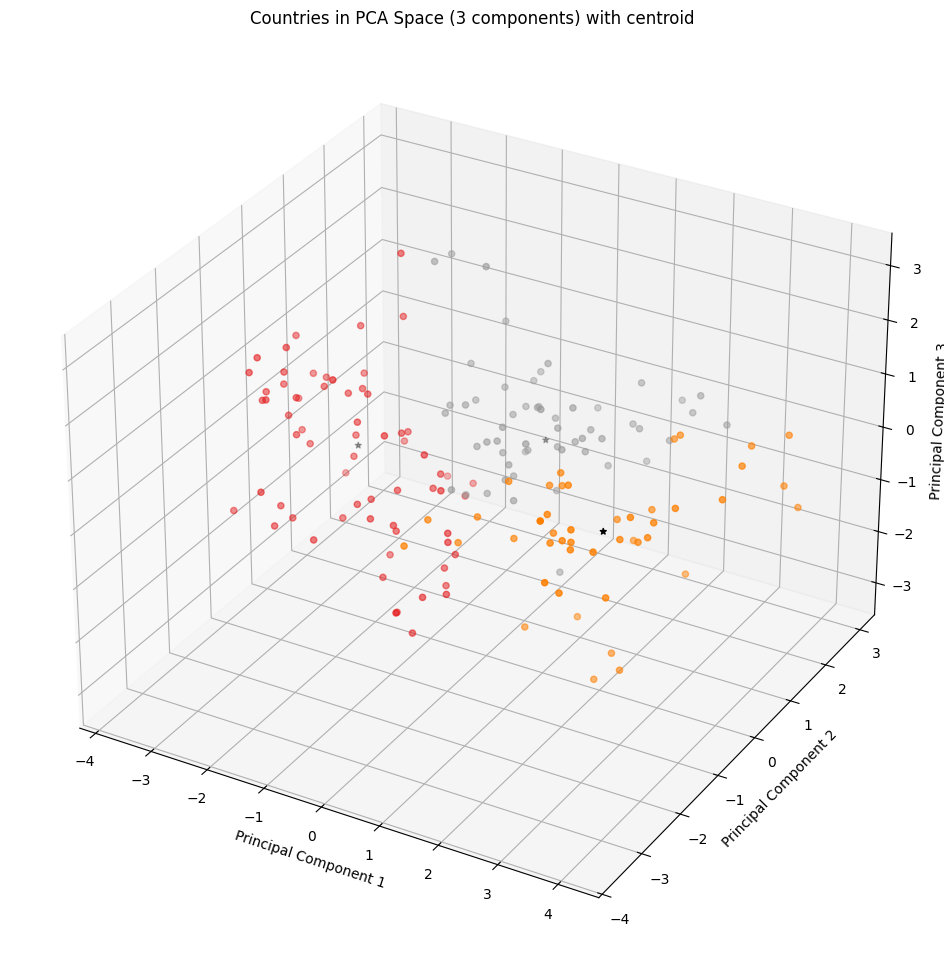

In [20]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot in 3D
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=df["Cluster"], cmap="Set1")
scatter = ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'black', marker='*', label = 'centroid')

# Add title and labels
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.title("Countries in PCA Space (3 components) with centroid")

plt.show()

In [21]:
# Statistics summary per cluster
numeric_cols = df.select_dtypes(include="number").columns
cluster_summary = df.groupby("Cluster")[numeric_cols].agg(["mean", "median", "min", "max"])
print(cluster_summary)

        child_mort                        exports                         \
              mean median   min    max       mean median      min    max   
Cluster                                                                    
0        69.568182   65.6  10.0  116.0  27.955285  24.35   3.9094  80.57   
1         6.802222    4.5   2.8   19.8  44.915778  40.10  10.7000  80.57   
2        22.244643   17.4   4.5   99.7  47.592500  47.45  12.4000  80.57   

           health         ... total_fer                gdpp                    \
             mean median  ...       min   max          mean   median      min   
Cluster                   ...                                                   
0        5.677424   5.17  ...      1.57  7.49   2660.655152   1210.0   331.62   
1        8.452444   9.01  ...      1.15  3.03  32994.222222  35300.0  6250.00   
2        6.841964   6.51  ...      1.25  4.34   6135.107143   4635.0   786.00   

                 Cluster                 
             m

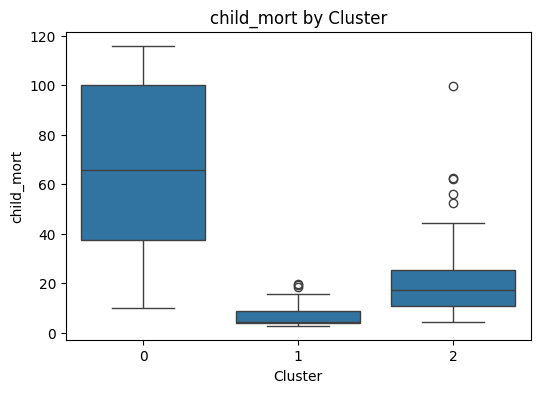

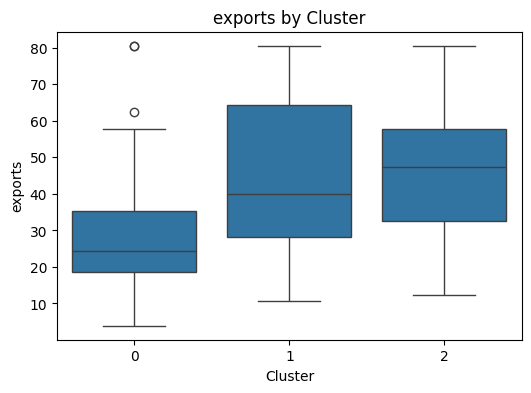

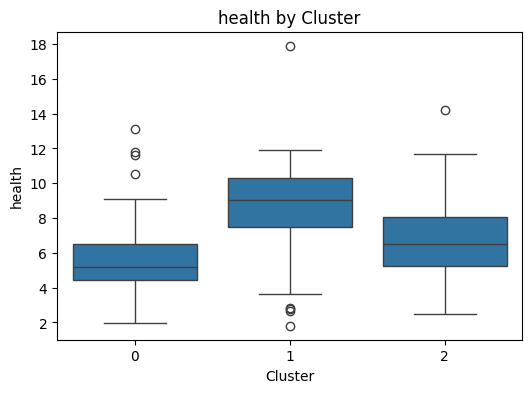

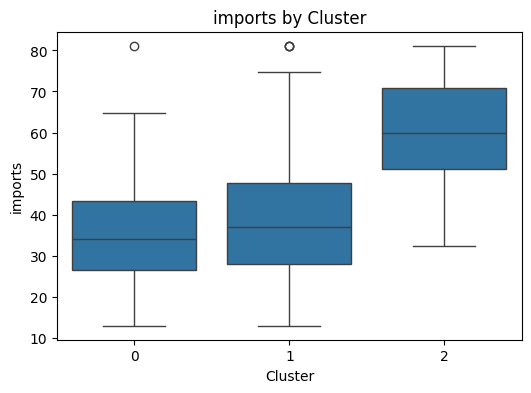

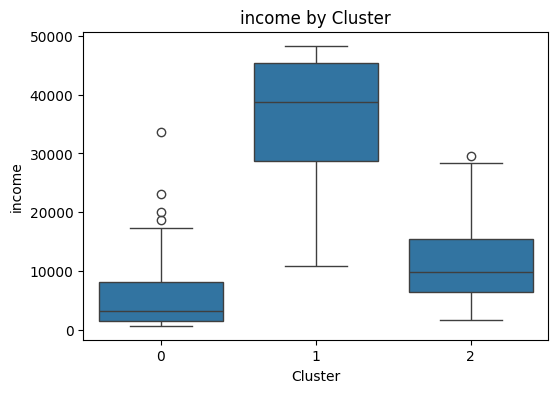

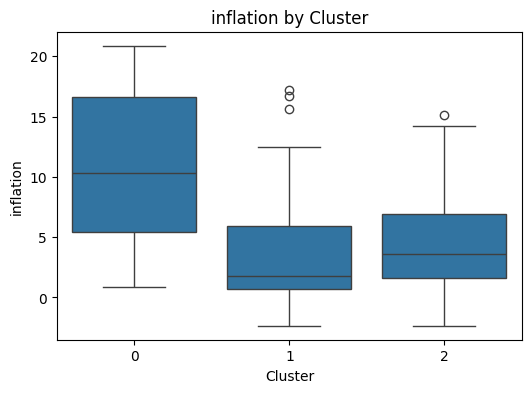

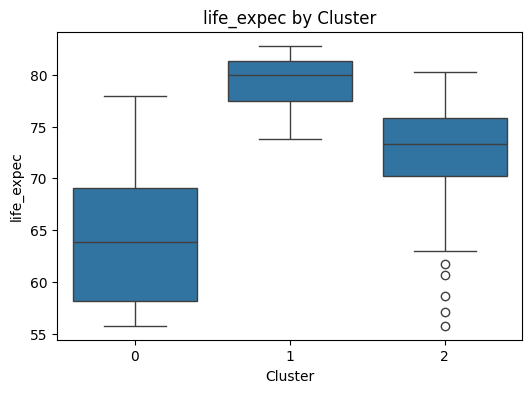

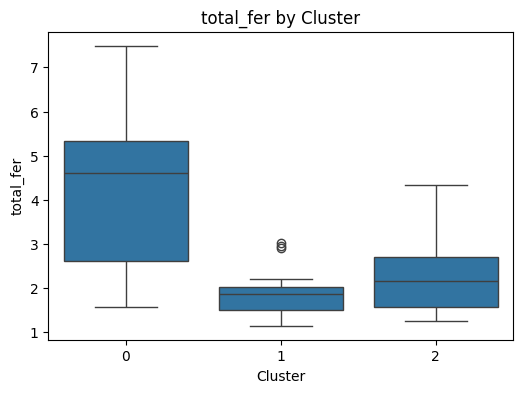

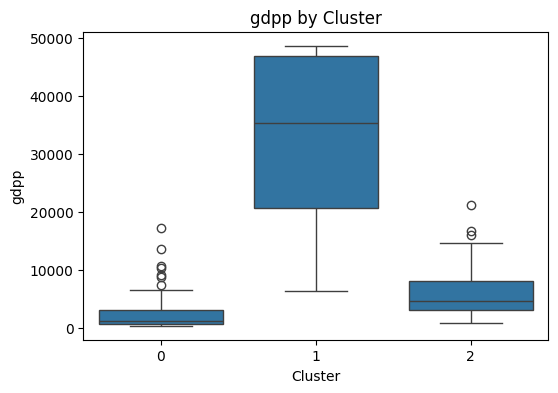

In [22]:
# Check the distribution of each Feature by cluster
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for feat in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Cluster", y=feat, data=df)
    plt.title(f"{feat} by Cluster")
    plt.show()

In [23]:
# Compare means side by side

# Extract means of each cluster
mean_values = df.groupby("Cluster")[['child_mort', 'exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer']].mean()
print(mean_values)
# Transpose - rows: features, columns = cluster
mean_value_transposed = mean_values.T
print(mean_value_transposed)


         child_mort    exports    health    imports  inflation  life_expec  \
Cluster                                                                      
0         69.568182  27.955285  5.677424  35.541333  11.236288   64.243030   
1          6.802222  44.915778  8.452444  40.197956   3.718427   79.357778   
2         22.244643  47.592500  6.841964  60.703571   4.482218   71.840714   

         total_fer  
Cluster             
0         4.244242  
1         1.840667  
2         2.310000  
Cluster             0          1          2
child_mort  69.568182   6.802222  22.244643
exports     27.955285  44.915778  47.592500
health       5.677424   8.452444   6.841964
imports     35.541333  40.197956  60.703571
inflation   11.236288   3.718427   4.482218
life_expec  64.243030  79.357778  71.840714
total_fer    4.244242   1.840667   2.310000


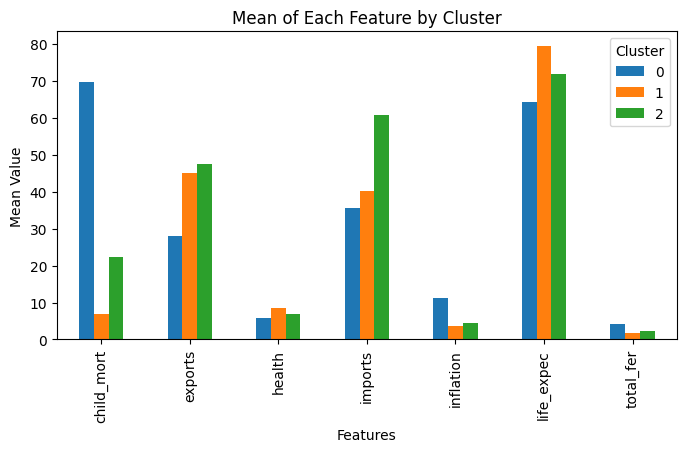

In [24]:
# plot tranposed 
mean_value_transposed.plot.bar(figsize=(8,4))
plt.title("Mean of Each Feature by Cluster")
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.show()